In [1]:
from frozen_yoghourt import *

Duplicate key in file '/Users/minhpham/.matplotlib/matplotlibrc', line 2 ('backend: TkAgg')
Duplicate key in file '/Users/minhpham/.matplotlib/matplotlibrc', line 3 ('backend: TkAgg')
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/qiskit/aqua/operators/operator_globals.py:48: DeprecationWarning: `from_label` is deprecated and will be removed no earlier than 3 months after the release date. Use Pauli(label) instead.
  X = make_immutable(PrimitiveOp(Pauli.from_label('X')))


In [2]:
## Total Difference function

def cx_diff(y_hat, n):
    qc = q(n+1)
    qc.mct(list(range(n)), n)
    y = get(qc, nice = False)
    
    diff = np.sum(np.abs(np.abs(y_hat) - y))
    
    return diff

In [3]:
# Define general loss function

loss = lambda y_hat, y: np.mean(np.linalg.norm(np.abs(np.abs(y_hat) - y), axis = 0))/np.sqrt(2)

In [4]:
## This function will calculate the cost for all the circuit that is 
## made up of cx with target as the last qubit, and U gates in between

In [5]:
def general_circ(n, order, angles):
    
    
    """
    Create a circuit with all the angles and cx in order
    
    Parameters:
    -----------
    n: int
        The number of control bits in the circuit
    order: list
        The order of the indices of control bits from left to right
    angles: ndarray
        Array of euler angles for the U gates
        
    Returns:
    --------
    circ: QuantumCircuit
        Circuit with all the angles and cx in order
        
    """
    
    circ = q(n+1)

    for i, control in enumerate(order):
        circ.u(angles[3*i], angles[3*i+1], angles[3*i+2], n)
        circ.cx(control, n)

    circ.u(angles[-3], angles[-2], angles[-1], n)
    
    return circ

In [6]:
def general_cost(angles):
    
    ### Remember to write the values for n and order here because sp only allows function with 1 parameters
    
    n = 2
    order = [0, 1, 0]
    
    """
    
    This function will calculate the cost for all the circuit that is made up of cx with target as the last qubit, 
    and U gates in between
    
    Parameters:
    -----------
    n: int
        The number of control bits in the circuit
    order: list
        The order of the indices of control bits from left to right
    angles: ndarray
        Array of euler angles for the U gates
        
        
    Returns:
    --------
    cost: float
        Average cost of all expected outputs
        
    """
    
    m = len(order)
    
    # Initialize Parameter list
    U_list = [U(angles[3*i], angles[3*i + 1], angles[3*i+2]) for i in range(m+1)]

    cost = 0

    # Create the list of inputs as tuples (q0, q1, q2, ..., q2^n)
    input_list = product([I, X], repeat = n)

    # Create the list of output
    output_list = [I]*(2**n)
    output_list[-1] = X

    for j, inp in enumerate(input_list):

        Uh_list = list.copy(U_list)

        for k, index in enumerate(order):
            Uh_list.insert(2*k+1, inp[index])

        Uhi = mat_mul(*reversed(Uh_list))

        cost += loss(Uhi, output_list[j])  

    cost /= 2**n
    
    return cost

### Testing Different Architecture

In [7]:
# Optimizers List
"Nelder-Mead" , "Powell" , "CG" , "BFGS" , "Newton-CG" , "L-BFGS-B" , "TNC" , "COBYLA" 
"SLSQP" , "trust-constr", "dogleg" , "trust-ncg" , "trust-exact" , "trust-krylov"

('SLSQP', 'trust-constr', 'dogleg', 'trust-ncg', 'trust-exact', 'trust-krylov')

In [16]:
# Parameters
n = 2
order = [0, 1, 0]
angles = np.random.uniform(0, 2*np.pi, (12,))

In [17]:
# First Optimization Iterations
result = sp.optimize.minimize(general_cost, angles, method = "Nelder-Mead" )

In [18]:
# Further Optimization Iterations

'''reps = 

for _ in range(reps):
    result = sp.optimize.minimize(general_cost, result.x, method = "Nelder-Mead" )'''

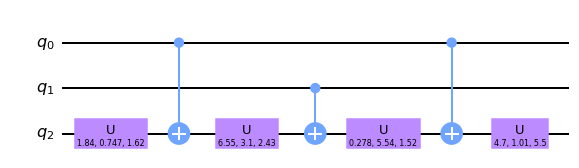

In [19]:
# Draw Circuit
circ = general_circ(n, order, result.x)

milk(circ)

In [20]:
# View Unitary
view(np.abs(get(circ, nice = False)))

Matrix([
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]])

In [21]:
# Get total between different value
cx_diff(np.abs(get(circ, nice = False)), n)

2.2213807504752896e-15